# Project2: Data Wrangling (Gather, Assess and Clean) using Pandas

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#store">Store</a></li>
<li><a href="#analyze">Analyze & Visualize</a></li>

</ul>

<a id='intro'></a>
## Introduction
### Overview
Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document the wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

#### Project Steps Overview

Our tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

    - The data wrangling efforts

    - The data analyses and visualizations


Let's Start first by importing all needed libraries.

In [190]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import json
#import os
import requests
#from PIL import Image
#from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import tweepy

## ***Gathering Data***
<a id='gather'></a>
Next, we will do the following:

 - Each piece of data is imported into a separate pandas DataFrame at first.
 - From at least the three (3) different sources on the Step 1: Gathering Data page.
 - In at least the three (3) different file formats on the Step 1: Gathering Data page.

#### First File: Read a CSV file from local machine called: twitter-archive-enhanced.csv

In [4]:
# Loading file 1:
#  Load your data from a csv file which is a flat file and print out a few lines.
twitter_archive_df = pd.read_csv('2_project_data_wrangling/twitter-archive-enhanced.csv')
# display first five rows of data
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Second File: Download programatically a tsv file called: image-predictions.tsv then read it

In [ ]:
# Download image-predictions.tsv programmatically as instructed by Udacity
# using "Requests" library
# source of inspiration: https://www.adamsmith.haus/python/answers/how-to-download-a-csv-file-from-a-url-in-python
#put the url in a variable
tsv_file_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# giving the url to get method replies with a request answer object
request_object=requests.get(tsv_file_url)

# take the content of the request answer object in a variable
tsv_content = request_object.content

# ->we create a new file 'downloaded_image-predictions.tsv' in the specified location.
# ->the mode 'wb' opens (in the write mode) and truncates the file to 0 bytes. if 'b' wasn't specified, the content
# of the file would have been returned as strings. We would prefer to let it as bytes and specify encoding later 
# if necessary.
tsv_file=open('2_project_data_wrangling/downloaded_image-predictions.tsv','wb')
# Write the content of the request object into the newly created and specified file.
tsv_file.write(tsv_content)

# write method doesn't return anything until  flush() or close() method is called.
tsv_file.close()



In [5]:
# Loading file 2:
# Load your data from a tsv file which is a flat file and print out a few lines.
# tsv files have "tab" as separator, so we need to add the sep parameter "\t" in order to read the file correctly
image_predictions_df = pd.read_csv('2_project_data_wrangling/downloaded_image-predictions.tsv', sep="\t")
# display first five rows of data
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Third File: Download more necessary data using Twitter API into a file called: tweet-json.txt then put it into a dataframe and read it

In [46]:
# information about Keys and tokens used in tweepy in order to access Twitter API:

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#source of inspiration of "wait_on_rate_limit=True": https://stackoverflow.com/questions/21308762/avoid-twitter-api-limitation-with-tweepy
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# First attempt : successful in terms of putting tweets in a list and then in a dataframe without passing through a .txt file.
temp_list=[]
error_ids=[]
for tweet_id in twitter_archive_df.tweet_id:
    print("tweet_id:",tweet_id)
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        retweet_count=tweet.retweet_count
        favorite_count=tweet.favorite_count
        temp_list.append({
            'tweet_id':tweet_id,
            'retweet_count':retweet_count,
            'favorite_count':favorite_count
        })
    except Exception as e:
        error_ids.append(tweet_id)
        print("not cool")

temp_list_df=pd.DataFrame(temp_list,columns=['tweet_id','retweet_count','favorite_count'])

    


In [ ]:
# Second attempt: Successful in terms of creating the .txt file, but hard to exploit later.
# I put every tweet information into a string variable called: "jsonString" then 
# I put the content of that variable intp a file called tweet-json.txt.
# I found it difficult to exploit the content later as a json file. But I will get back to that.

from time import time, ctime
total_errors=[]
jsonString=""
add_one_more_tweet=""

for tweet_id in twitter_archive_df.tweet_id:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        jsonString+=add_one_more_tweet.join(str(tweet._json))+"\n"
    except Exception as e:
        t = time()
        error_detail={
            "tweet_id":tweet_id,
            "exception":e,
            "time":ctime(t)
        }
        total_errors.append(error_detail)

with open('Tweet-json.txt', 'w') as outfile:
    outfile.write(jsonString)

In [47]:
# SUCCESSFUL USEFUL third Attempt to create a file of json elements from the beginning, then read it 
# in a dataframe line by line:
from time import time, ctime
total_errors=[]
with open('Tweet-json.txt', 'w') as outfile:
    for tweet_id in twitter_archive_df.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            retweet_count=tweet.retweet_count
            favorite_count=tweet.favorite_count
            one_tweet_dict={
                'tweet_id':tweet_id,
                'retweet_count':retweet_count,
                'favorite_count':favorite_count
            }
            #print('one_tweet_dict:',one_tweet_dict)
            json.dump(one_tweet_dict, outfile)
            outfile.write('\n')
        except Exception as e:
            # Try to understand what kinds of errors we have.
            time_of_exception = time()
            error_detail={
                "tweet_id":tweet_id,
                "exception":e,
                "time":ctime(time_of_exception)
            }
            total_errors.append(error_detail)
            #print('error_detail:',error_detail)

one_tweet_dict: {'tweet_id': 892420643555336193, 'retweet_count': 6973, 'favorite_count': 33701}
one_tweet_dict: {'tweet_id': 892177421306343426, 'retweet_count': 5275, 'favorite_count': 29229}
one_tweet_dict: {'tweet_id': 891815181378084864, 'retweet_count': 3464, 'favorite_count': 21976}
one_tweet_dict: {'tweet_id': 891689557279858688, 'retweet_count': 7193, 'favorite_count': 36795}
one_tweet_dict: {'tweet_id': 891327558926688256, 'retweet_count': 7719, 'favorite_count': 35187}
one_tweet_dict: {'tweet_id': 891087950875897856, 'retweet_count': 2587, 'favorite_count': 17752}
one_tweet_dict: {'tweet_id': 890971913173991426, 'retweet_count': 1648, 'favorite_count': 10334}
one_tweet_dict: {'tweet_id': 890729181411237888, 'retweet_count': 15686, 'favorite_count': 56677}
one_tweet_dict: {'tweet_id': 890609185150312448, 'retweet_count': 3605, 'favorite_count': 24433}
one_tweet_dict: {'tweet_id': 890240255349198849, 'retweet_count': 6074, 'favorite_count': 27856}
one_tweet_dict: {'tweet_id': 

In [7]:
# Put the .txt file in a dataframe and read it line by line.
tweet_json_df = pd.read_json('Tweet-json.txt',lines = True)

## ***Assessing Data***
<a id='assess'></a>

Two types of assessment are used:

- Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

- Programmatic assessment: pandas' functions and/or methods are used to assess the data.

At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each.

##### ***The four main data quality dimensions are:***

**Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

**Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

**Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

**Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

##### ***And there are three requirements for tidiness.***

Each variable forms a column
Each observation forms a row
Each type of observational unit forms a table

We will try to separate each quality dimension or tidiness issue because it will help us identify by what issues to start first in the cleaning process.

#### Dataframe: twitter_archive_df

##### Quality issues:

***Completeness:***
- "in_reply_to_status_id" column has missing values (NaN) 

- "in_reply_to_user_id" column has missing values (NaN)

- "retweeted_status_id" column has missing values (NaN) and few values as IDs which indicates that this file contains not only original tweets but also some retweets that might alter our analysis later. 

- "retweeted_status_user_id" column has missing values (NaN) and few values as IDs which indicates that this file contains not only original tweets but also some retweets that might alter our analysis later.

- "retweeted_status_timestamp" column has missing values (NaN).

- "expanded_urls" have missing values (empty cells)

- "text" column has in some of the cells a url at the end of the text, and some of those urls are incomplete (e.g. https://t…)


***Validity:***
- in "name" column, some names have "None" as a value or other weird values as the letter "a", "the" or "not".

- Dataset has retweets of already existing original tweets

- (Programmatically) There are 181 retweets in the file

- "expanded_urls" have one url or more separated by a comma

- Programmatically) There are 2356-2297 = 59 empty "expanded_urls" cells (mostly are replies)


***Consistency***
- in "source" column we have the whole HTML tags.


***Accuracy***
- (Programmatically) Erroneous datatype "timestamp" and "retweeted_status_timestamp" type is an object

- (Programmatically) a "rating_numerator" has value of 1776, many others also have values by far greater than 10

- (Programmatically) a "rating_denominator" has value of 170, others also have values by far greater than  10


##### Tidiness issues:

- "dogger", "flooter", "pupper" and "puppo" columns: each row has at most one value in one of the 4 columns or None in all of them. These are stages of dogs' life according to the dogtionary which means they are values of the same variable.


#### Dataframe from: image-predictions.tsv

##### Quality issues:

***Validity:***
- "jpg_url" contains some images that have no dogs on them (e.g. https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg). Since the goal was to classify breeds of dogs, this will result in false/irrelevant predictions.

- "img_num" column contains some choices that are not even dogs even if the image has a dog in it but it's quality is low or the dog is wearing something. e.g. https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg

##### Tidiness issues:
- The content is related to the same data of twitter-archive-enhanced.csv with one common column : tweet_id

#### Dataframe from twitter-json.txt

##### quality issues:

- (Programmatically) Number of tweets is 2326 less than number of tweets(including retweets) of twitter-archive-enhanced.csv file (2356) by 30. May be those were the supposedly deleted tweets catched in the exception list while importing data using twitter API.

##### Tidiness issues:
- The content is related to the same data of twitter-archive-enhanced.csv with one common column : tweet_id



In [9]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


All Tweep Errors were: code': 144, 'message': 'No status found with that ID.' this means that it's highly probable that the tweets were deleted.

In [ ]:
# Check the Errors:
total_errors_df=pd.DataFrame(total_errors, columns=['tweet_id','exception','time'])
total_errors_df

In [6]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [51]:

twitter_archive_df.groupby('rating_denominator').apply(lambda x: x.rating_denominator>20).sort_values(ascending=False)


rating_denominator      
170                 1120     True
80                  1254     True
150                 902      True
40                  1433     True
50                  1202     True
                            ...  
10                  1574    False
                    1573    False
                    1572    False
                    1571    False
0                   313     False
Name: rating_denominator, Length: 2356, dtype: bool

In [17]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [26]:
# find all duplicates
# https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

ids = twitter_archive_df["tweet_id"]
twitter_archive_df[ids.isin(ids[ids.duplicated()])].sort_values("tweet_id")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
# many expanded_urls are used in more than 1 tweet (1 tweet and others are retweets)
twitter_archive_df.expanded_urls.value_counts()

In [56]:
# There are 97 doggo
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [57]:
# There are 10 floofer
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [58]:
# There are 257 pupper
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [59]:
# There are 30 puppo
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [50]:
# let's visualize twitter_archive_df
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [60]:
# let's visualize image_predictions_df
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [61]:
# let's visualize tweet_json_df
tweet_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33701
1,892177421306343426,5275,29229
2,891815181378084864,3464,21976
3,891689557279858688,7193,36795
4,891327558926688256,7719,35187
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,115,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [62]:
twitter_archive_df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Norman       1
Huck         1
Rooney       1
Pluto        1
Wiggles      1
Name: name, Length: 957, dtype: int64

In [63]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [64]:
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417584e+17,2458.604041,7031.398538
std,6.820224e+16,4165.747348,10923.553431
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,492.250000,1224.750000
50%,7.178159e+17,1143.500000,3040.000000
75%,7.986402e+17,2840.750000,8572.250000
max,8.924206e+17,70352.000000,144291.000000


In [8]:
all_columns = pd.Series(list(twitter_archive_df) + list(image_predictions_df) + list(tweet_json_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## ***Cleaning Data***
<a id='clean'></a>
The define, code, and test steps of the cleaning process are clearly documented.

Copies of the original pieces of data are made prior to cleaning.

All issues identified in the assess phase are successfully cleaned (if possible) using Python and pandas, and include the cleaning tasks required to satisfy the Project Motivation.

A tidy master dataset (or datasets, if appropriate) with all pieces of gathered data is created.

In [9]:
# First, let's create copies of the dataframes before we start the cleaning:
clean_twitter_archive_df = twitter_archive_df.copy()
clean_image_predictions_df = image_predictions_df.copy()
clean_twitter_json_df = tweet_json_df.copy()

* __Define__:
    1. (Tidiness) Marge all 3 dataframes using tweet_id column
    
    2. (Validity) There are 181 retweets in the file that need to be deleted from data.

    3. completeness issues:
        - "in_reply_to_status_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

        - (completeness) "in_reply_to_user_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

        - (completeness) "retweeted_status_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

        - (completeness) "retweeted_status_user_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

        - (completeness) "retweeted_status_timestamp" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

        - (Consistency) in "source" column we have the whole HTML tags and also won't have any role in our analysis, so we delete it.

    4. (Tidiness) Create a new column called dog_stage and put values that are different from None from "dogger", "flooter", "pupper" and "puppo" columns. Then delete these 4 columns.
    
    5. (Accuracy) Erroneous datatype "timestamp" and "retweeted_status_timestamp" type is currently an object and should become datetime.

    6. "rating_numerator" and "rating_denominator" to be stardardized


* __Define 1__: (Tidiness) Marge all 3 dataframes using tweet_id column

* __Code 1:__

In [11]:
clean_twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
clean_image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [100]:
# Let's merge all new copies of dataframes in one dataframe:
intermediate_df=clean_twitter_archive_df.merge(clean_image_predictions_df, on='tweet_id')

* __Intermidiate test 1:__

In [101]:
intermediate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

It seems we kept only the rows that have existing tweet_id's in both dataframes which are 2075 rows

In [125]:
# All 3 dataframes merge:
merged_clean_df=intermediate_df.merge(clean_twitter_json_df,on='tweet_id')

* __Final test 1:__

In [126]:
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

It seems we kept only the rows that have existing tweet_id's in both dataframes which are 2057 row

Now, we would have addressed the completeness issues first, but since we will be deleting all columns related to retweets, we need to delete the rows about retweets first because it will be more difficult to find them otherwise.

* __Define 2:__ (Validity) There are retweets in the file that need to be deleted from data.

* __Code 2:__ 

In [127]:
# Inspiration: https://stackoverflow.com/questions/57540261/drop-all-rows-in-pandas-dataframe-where-value-is-not-nan
# Let's delete retweets:
merged_clean_df=merged_clean_df.drop(merged_clean_df.dropna(subset=['retweeted_status_id']).index)

* __test 2:__ 

In [128]:
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1986 non-null   object 
 13  doggo                       1986 

Now we have removed all retweets from the "merged_clean_df". we still have 1986 original tweet.

* __Define 3:__ Drop all columns that are no longer needed or irrelevant:

    - (completeness) "in_reply_to_status_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

    - (completeness) "in_reply_to_user_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

    - (completeness) "retweeted_status_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

    - (completeness) "retweeted_status_user_id" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

    - (completeness) "retweeted_status_timestamp" column has missing values (NaN) and also won't have any role in our analysis, so we delete it.

* __Code 3:__ 

In [129]:
# We will drop irrelevant columns
merged_clean_df.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id',
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'
                    ], 
                    axis = 1, inplace=True)

* __test 3:__ 

In [130]:
merged_clean_df.info()
merged_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   expanded_urls       1986 non-null   object 
 5   rating_numerator    1986 non-null   int64  
 6   rating_denominator  1986 non-null   int64  
 7   name                1986 non-null   object 
 8   doggo               1986 non-null   object 
 9   floofer             1986 non-null   object 
 10  pupper              1986 non-null   object 
 11  puppo               1986 non-null   object 
 12  jpg_url             1986 non-null   object 
 13  img_num             1986 non-null   int64  
 14  p1                  1986 non-null   object 
 15  p1_conf             1986 non-null   float64
 16  p1_dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33701
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5275,29229
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21976
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36795
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7719,35187


In [131]:
merged_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

We still have only 25 columns out of 30 previously

* __Define 4:__ (Tidiness) Create a new column called dog_stage and put values that are different from None from "dogger", "flooter", "pupper" and "puppo" columns. Then delete these 4 columns.

* __Code 4:__ 

In [132]:
new_merged_clean_df=merged_clean_df

In [78]:
""""
def moreThanOneStage(dataframe):
    for stage in dataframe:
        flo=stage['floofer'].str.lower().str.replace('s/+',"")
        print ("flo:", flo)
        dog=stage['doggo'].str.lower().str.replace('s/+',"")
        print("dog:" ,dog)
        pupe=stage['pupper'].str.lower().str.replace('s/+',"")
        print( "pupe:",pupe)
        pupo=stage['puppo'].str.lower().str.replace('s/+',"")
        if ((flo == 'none') & (dog == 'none') & (pupe == 'none')):
            dataframe['more_than_one_stage']=False
        if ((dog=="none") & (pupe=="none") & (pupo=="none")):
            dataframe['more_than_one_stage']=False
        if ((flo=="none") & (pupe=="none") & (pupo=="none")):
            dataframe['more_than_one_stage']=False
        else:
            dataframe['more_than_one_stage']=True
    return dataframe
"""

In [133]:
# trying to determine if a dog has more than one gog stage affected

#new_merged_clean_df=moreThanOneStage(merged_clean_df)

In [134]:
new_merged_clean_df['dog_stage'] = merged_clean_df[['floofer','doggo', 'pupper','puppo']].apply(lambda x: "floofer" if x.floofer.lower()=="floofer" else "doggo" if x.doggo.lower()== "doggo" else "pupper" if x.pupper.lower()=="pupper" else "puppo" if x.puppo.lower()=="puppo" else "None", axis=1) 

In [135]:
new_merged_clean_df.drop(['floofer', 
                        'doggo',
                        'pupper', 
                        'puppo'
                        ], 
                        axis = 1, inplace=True)

* __Test 4:__ 

In [136]:
new_merged_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [137]:
new_merged_clean_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36795,None
871,739238157791694849,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,...,True,Siberian_husky,0.390413,True,malamute,0.080901,True,52647,106821,doggo
1693,672877615439593473,2015-12-04 20:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's getting bombarded with the...,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,...,True,beagle,0.068066,True,borzoi,0.045071,True,300,907,None
1069,707776935007539200,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,...,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True,871,3007,None
1831,670338931251150849,2015-11-27 20:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butters. He's not ready for Thanksgivi...,https://twitter.com/dog_rates/status/670338931...,10,10,Butters,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,...,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True,96,373,None
1409,681694085539872773,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,...,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True,3680,11782,pupper
882,737445876994609152,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13,10,None,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,...,True,Pomeranian,0.331268,True,Maltese_dog,0.045426,True,4041,9420,floofer
105,867774946302451713,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg,2,...,True,Cardigan,0.175718,True,collie,0.087142,True,6228,30170,None
1054,708834316713893888,2016-03-13 01:57:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Malikai. He was rolling around having fun...,https://twitter.com/dog_rates/status/708834316...,10,10,Malikai,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,...,True,giant_panda,0.218252,False,malamute,0.180401,True,448,1550,None
1563,675707330206547968,2015-12-12 16:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We've got ourselves a battle here. Watch out R...,https://twitter.com/dog_rates/status/675707330...,11,10,None,https://pbs.twimg.com/media/CWCYOqWUAAARmGr.jpg,1,...,False,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False,597,1785,None


In [138]:
new_merged_clean_df.dog_stage.value_counts()


None       1681
pupper      203
doggo        72
puppo        22
floofer       8
Name: dog_stage, dtype: int64

* __Define 5:__  "timestamp" datatype is currently an object and should become datetime.

* __Code 5:__

In [139]:
new_merged_clean_df.timestamp = pd.to_datetime(new_merged_clean_df['timestamp'])

* __Test 5:__

In [140]:
new_merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   int64              
 6   rating_denominator  1986 non-null   int64              
 7   name                1986 non-null   object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

It seems we have also the timezone along side the datetime. We are going to remove the timezone since we don't need it.

* __Define 6:__ Remove time zone from timestamp.

* __Code 6:__

In [141]:
# source of inspiration: https://stackoverflow.com/questions/49198068/how-to-remove-timezone-from-a-timestamp-column-in-a-pandas-dataframe

new_merged_clean_df['timestamp'].dt.tz_localize(None)


0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2052   2015-11-16 00:24:50
2053   2015-11-16 00:04:52
2054   2015-11-15 23:21:54
2055   2015-11-15 23:05:30
2056   2015-11-15 22:32:08
Name: timestamp, Length: 1986, dtype: datetime64[ns]

* __Test 6:__

In [142]:
new_merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   int64              
 6   rating_denominator  1986 non-null   int64              
 7   name                1986 non-null   object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

In [143]:
new_merged_clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,6973,33701,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5275,29229,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21976,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36795,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7719,35187,None


* __Define 7:__     - (Consistency) in "source" column we need to remove the whole HTML tags 

* __Code 7:__

In [170]:
from bs4 import BeautifulSoup

In [179]:
# inspiration source: https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
for source in new_merged_clean_df.source:
    soup= BeautifulSoup(source)
    text=soup.get_text()
    new_merged_clean_df.source=text

* __Test 7:__

In [181]:
new_merged_clean_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
923,728653952833728512,2016-05-06 18:33:34+00:00,Twitter for iPhone,This is Coleman. Somebody needs to tell him th...,https://twitter.com/dog_rates/status/728653952...,8,10,Coleman,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,...,False,studio_couch,0.053515,False,rotisserie,0.041248,False,945,3055,None
358,817423860136083457,2017-01-06 17:33:29+00:00,Twitter for iPhone,This is Ken. His cheeks are magic. 13/10 (IG: ...,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,...,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,13529,31739,None
1380,683481228088049664,2016-01-03 02:53:17+00:00,Twitter for iPhone,Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,...,True,chow,0.442016,True,German_shepherd,0.013206,True,901,2443,pupper
430,805932879469572096,2016-12-06 00:32:26+00:00,Twitter for iPhone,This is Major. He put on a tie for his first r...,https://twitter.com/dog_rates/status/805932879...,12,10,Major,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,...,True,keeshond,0.319136,True,Leonberg,0.007947,True,1795,7856,None
708,759846353224826880,2016-07-31 20:21:02+00:00,Twitter for iPhone,This is Kirby. He's a Beneblip Cumberpat. Pret...,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,...,True,vizsla,0.141094,True,otterhound,0.092198,True,1793,6268,None
510,793150605191548928,2016-10-31 18:00:14+00:00,Twitter for iPhone,This is Nida. She's a free elf. Waited so long...,https://twitter.com/dog_rates/status/793150605...,11,10,Nida,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,...,True,bluetick,0.160380,True,standard_poodle,0.125982,True,1592,5834,None
73,876120275196170240,2017-06-17 16:52:05+00:00,Twitter for iPhone,"Meet Venti, a seemingly caffeinated puppoccino...",https://twitter.com/dog_rates/status/876120275...,13,10,Venti,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,...,True,Saint_Bernard,0.346312,True,Greater_Swiss_Mountain_dog,0.094933,True,3891,24613,None
1501,677662372920729601,2015-12-18 01:31:14+00:00,Twitter for iPhone,In honor of the new Star Wars movie. Here's Yo...,https://twitter.com/dog_rates/status/677662372...,12,10,None,https://pbs.twimg.com/media/CWeKTZTWsAA5R3Z.jpg,1,...,False,trench_coat,0.127086,False,cloak,0.071439,False,840,1771,None
203,842846295480000512,2017-03-17 21:13:10+00:00,Twitter for iPhone,This is Charlie. He's wishing you a very fun a...,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,...,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True,3311,14190,None
1259,691096613310316544,2016-01-24 03:14:07+00:00,Twitter for iPhone,Here we see one dog giving a puptalk to anothe...,https://twitter.com/dog_rates/status/691096613...,11,10,None,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,...,True,llama,0.278270,False,Arabian_camel,0.063503,False,792,2755,None


In [182]:
new_merged_clean_df.source.value_counts() 

Twitter for iPhone    1986
Name: source, dtype: int64

***Storing and Acting on Wrangled Data***

Students will save their gathered, assessed, and cleaned master dataset(s) to a CSV file or a SQLite database.

The master dataset is analyzed using pandas or SQL in the Jupyter Notebook and at least three (3) separate insights are produced.

At least one (1) labeled visualization is produced in the Jupyter Notebook using Python’s plotting libraries or in Tableau.

Students must make it clear in their wrangling work that they assessed and cleaned (if necessary) the data upon which the analyses and visualizations are based.

## Store cleaned data in a new csv file:
<a id='store'></a>


In [183]:
new_merged_clean_df.to_csv('twitter_archive_master.csv', index=False) 

<a id='analyze'></a>

## Visualizations:


Let's see:
1. The source of twitter traffic in the cleaned dataset
2. Number of tweets over time
3. Number of retweets over time
4. Visualization of the number of favorites and how much is it correlated to the number of retweets 

1. Source of twitter traffic:

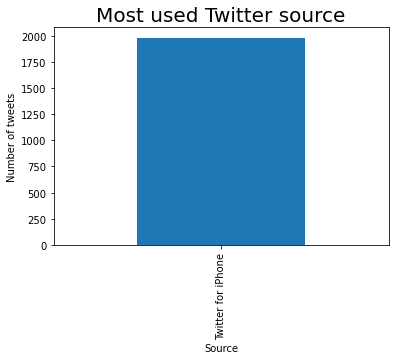

In [189]:
source_bar = new_merged_clean_df.source.value_counts().plot.bar(fontsize = 10)

plt.title('Most used Twitter source', fontsize = '20')
plt.xlabel('Source', fontsize = '10')
plt.ylabel('Number of tweets', fontsize = '10');

There is only one source of traffic for all the tweets in the cleaned version: Twitter for iphone

2. Number of tweets over time


In [223]:
# source of inspiration: https://stackoverflow.com/questions/55559356/how-do-i-group-date-by-month-using-pd-grouper

tweets_in_time=new_merged_clean_df.groupby(pd.Grouper(key='timestamp', freq='M')).tweet_id.count().reset_index()
tweets_in_time.head()

,timestamp,tweet_id
0,2015-11-30 00:00:00+00:00,296
1,2015-12-31 00:00:00+00:00,366
2,2016-01-31 00:00:00+00:00,169
3,2016-02-29 00:00:00+00:00,111
4,2016-03-31 00:00:00+00:00,120


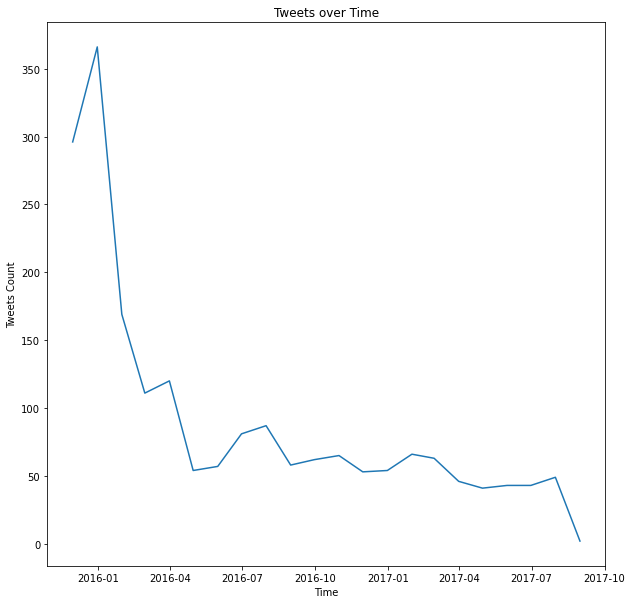

In [239]:
# source of inspiration: https://stackoverflow.com/questions/55559356/how-do-i-group-date-by-month-using-pd-grouper
import datetime
tweets_in_time=new_merged_clean_df.groupby(pd.Grouper(key='timestamp', freq='M')).tweet_id.count().reset_index()

plt.figure(figsize=(10, 10))
plt.title('Tweets over Time');
plt.xlabel('Time')
plt.ylabel('Tweets Count')
plt.plot(tweets_in_time.timestamp, tweets_in_time.tweet_id)



3. Number of retweets over time

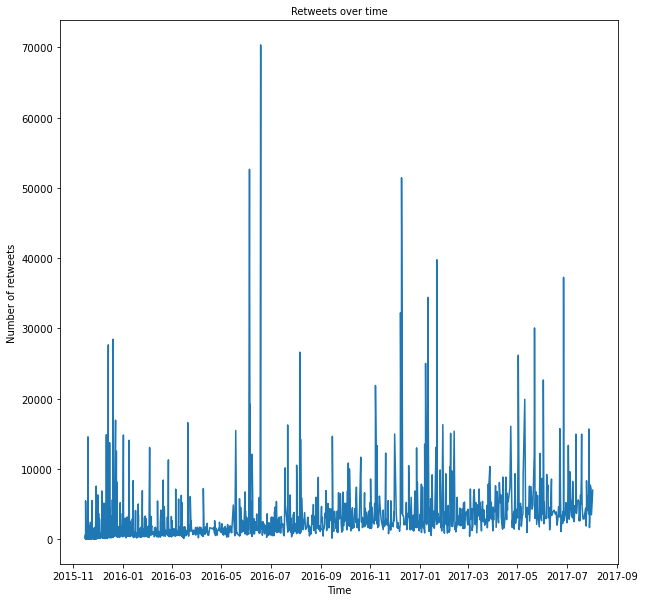

In [240]:
plt.figure(figsize=(10, 10))
plt.title('Retweets over time', fontsize = '10')
plt.xlabel('Time', fontsize = '10')
plt.ylabel('Number of retweets', fontsize = '10');
plt.plot(new_merged_clean_df.timestamp, new_merged_clean_df.retweet_count)


4. Visualization of the number of favorites and how much is it correlated to the number of retweets 

In [242]:
new_merged_clean_df.corr()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,0.023636,-0.022239,0.213122,0.104808,0.119029,-0.002334,0.122725,-0.047075,0.095884,0.384535,0.612041
rating_numerator,0.023636,1.000000,0.198240,-0.000710,-0.009088,-0.029155,-0.020821,-0.034695,-0.004158,-0.029360,0.018413,0.015932
rating_denominator,-0.022239,0.198240,1.000000,-0.004138,-0.004118,0.000814,-0.035112,-0.000625,0.006936,0.004879,-0.020166,-0.027131
img_num,0.213122,-0.000710,-0.004138,1.000000,0.204368,0.033054,-0.156451,0.052367,-0.141508,0.063166,0.103949,0.129626
p1_conf,0.104808,-0.009088,-0.004118,0.204368,1.000000,0.126237,-0.509900,0.140552,-0.707397,0.118610,0.048148,0.071022
p1_dog,0.119029,-0.029155,0.000814,0.033054,0.126237,1.000000,0.109993,0.636309,0.047051,0.557956,0.002686,0.043451
p2_conf,-0.002334,-0.020821,-0.035112,-0.156451,-0.509900,0.109993,1.000000,0.096556,0.481974,0.064349,-0.013994,-0.016484
p2_dog,0.122725,-0.034695,-0.000625,0.052367,0.140552,0.636309,0.096556,1.000000,0.035762,0.555094,0.013532,0.052579
p3_conf,-0.047075,-0.004158,0.006936,-0.141508,-0.707397,0.047051,0.481974,0.035762,1.000000,0.034034,-0.039104,-0.047438
p3_dog,0.095884,-0.029360,0.004879,0.063166,0.118610,0.557956,0.064349,0.555094,0.034034,1.000000,0.006203,0.034505


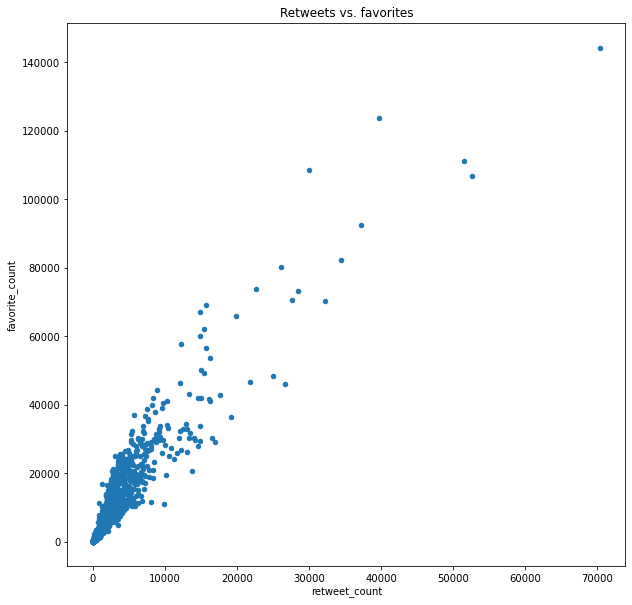

In [235]:

new_merged_clean_df.plot(x='retweet_count', y='favorite_count', kind='scatter', title = 'Retweets vs. favorites', figsize=(10, 10));

The plot suggests that there is a correlation between the number of retweets and the number of favorites